### Survival Analysis

Some popular models for survival analysis include the Kaplan Meier model, the Exponential model, the Weibull model, and the Cox Proportional-Hazards model.

In [ ]:
# pip install lifelines

In [1]:
# Dependencies
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

In [2]:
# Sample dataset: Clinical trial data (PatientID, Time to event, Event occurred)
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Time': [5, 12, 9, 7, 3, 15, 8, 6, 11, 2],
    'Event': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1],  # 1: Event occurred, 0: Censored (Event not occurred)
}

df = pd.DataFrame(data)

df.head()

,PatientID,Time,Event
0,1,5,1
1,2,12,1
2,3,9,0
3,4,7,1
4,5,3,1


In [3]:
# Kaplan-Meier estimator
kmf = KaplanMeierFitter()
kmf.fit(df['Time'], event_observed=df['Event'])

# Survival probabilities at specific time points
time_points = [2, 5, 8, 10]
survival_probs = kmf.predict(time_points)

Survival probabilities:
Time 2 months: 0.90
Time 5 months: 0.70
Time 8 months: 0.40
Time 10 months: 0.40


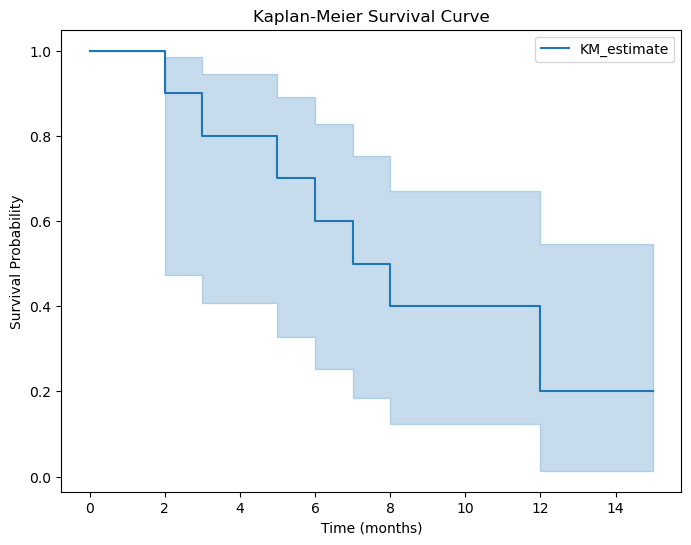


Cox Proportional Hazards Model - Hazard Ratios:
               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
PatientID  0.030412   1.030879  0.149602       -0.262803        0.323626   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                               
PatientID             0.768893              1.38213     0.0  0.203283   

                  p  -log2(p)  
covariate                      
PatientID  0.838914  0.253405  


In [4]:
print("Survival probabilities:")
for t, prob in zip(time_points, survival_probs):
    print(f"Time {t} months: {prob:.2f}")

# Plot the Kaplan-Meier survival curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
kmf.plot()
plt.title("Kaplan-Meier Survival Curve")
plt.xlabel("Time (months)")
plt.ylabel("Survival Probability")
plt.show()

# Cox Proportional Hazards Model
cph = CoxPHFitter()
cph.fit(df, duration_col='Time', event_col='Event')

# Print the hazard ratios and confidence intervals for each variable
print("\nCox Proportional Hazards Model - Hazard Ratios:")
print(cph.summary)


### Example 2

In [1]:
# Dependencies
import pandas as pd
from lifelines import CoxPHFitter

In [2]:
# Sample dataset: Clinical trial data (PatientID, Time to event, Event occurred, Age, Treatment)
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Time': [5, 12, 9, 7, 3, 15, 8, 6, 11, 2],
    'Event': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1],  # 1: Event occurred, 0: Censored (Event not occurred)
    'Age': [45, 32, 55, 67, 28, 60, 50, 38, 42, 53],
    'Treatment': [0, 1, 1, 0, 0, 1, 1, 0, 1, 0],  # 0: Control group, 1: Treatment group
}

df = pd.DataFrame(data)

In [3]:
# Cox Proportional Hazards Model
cph = CoxPHFitter()
cph.fit(df, duration_col='Time', event_col='Event', show_progress=True)

Iteration 1: norm_delta = 1.73606, step_size = 0.9500, log_lik = -12.61951, newton_decrement = 5.54566, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.73441, step_size = 0.9500, log_lik = -6.93596, newton_decrement = 0.46471, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.61547, step_size = 0.9500, log_lik = -6.38089, newton_decrement = 0.13569, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.55434, step_size = 1.0000, log_lik = -6.21195, newton_decrement = 0.04338, seconds_since_start = 0.0
Iteration 5: norm_delta = 0.53572, step_size = 1.0000, log_lik = -6.15737, newton_decrement = 0.01525, seconds_since_start = 0.0
Iteration 6: norm_delta = 0.53011, step_size = 1.0000, log_lik = -6.13812, newton_decrement = 0.00552, seconds_since_start = 0.0
Iteration 7: norm_delta = 0.52816, step_size = 1.0000, log_lik = -6.13114, newton_decrement = 0.00202, seconds_since_start = 0.0
Iteration 8: norm_delta = 0.52745, step_size = 1.0000, log_lik = -6.12859, newton_decrement = 0.

c:\Users\ejwda\Anaconda3\envs\python310\lib\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column Treatment have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['Event'].astype(bool)
>>> print(df.loc[events, 'Treatment'].var())
>>> print(df.loc[~events, 'Treatment'].var())

A very low variance means that the column Treatment completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
c:\Users\ejwda\Anaconda3\envs\python310\lib\site-packages\lifelines\utils\__init__.py:1165: ConvergenceWarning: Column Treatment has high sample correlation with the duration column. This may harm convergence. This could be a form of 'complete separation'.     See https://stats.sta

<lifelines.CoxPHFitter: fitted with 10 total observations, 3 right-censored observations>

In [4]:
# Print the hazard ratios and confidence intervals for each variable
print("\nCox Proportional Hazards Model - Hazard Ratios:")
print(cph.summary)



Cox Proportional Hazards Model - Hazard Ratios:
                coef     exp(coef)     se(coef)  coef lower 95%  \
covariate                                                         
PatientID   0.067779  1.070129e+00     0.165595       -0.256781   
Age        -0.045374  9.556399e-01     0.038177       -0.120199   
Treatment -18.537922  8.893710e-09  2338.445925    -4601.807714   

           coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%  cmp to  \
covariate                                                                     
PatientID        0.392340             0.773538             1.480441     0.0   
Age              0.029451             0.886744             1.029889     0.0   
Treatment     4564.731871             0.000000                  inf     0.0   

                  z         p  -log2(p)  
covariate                                
PatientID  0.409308  0.682313  0.551494  
Age       -1.188525  0.234626  2.091562  
Treatment -0.007927  0.993675  0.009154  
